In [170]:
import numpy as np # linear algebra library
import pandas as pd # data processing library
import matplotlib.pyplot as plt  # plotting library
from sklearn.model_selection import train_test_split #split data into train and test
from sklearn.feature_extraction.text import TfidfVectorizer #vectorize data
from sklearn.metrics import accuracy_score, precision_score #metrics
from sklearn.naive_bayes import MultinomialNB #naive bayes 

In [171]:
data = pd.read_csv('spam_ham_dataset.csv') #read csv file
data #print data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [172]:
data.info() #print info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [173]:
data.shape #print shape

(5171, 4)

In [174]:
data.head() #print head

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [175]:
data = data.rename(columns={'Unnamed: 0': 'index'}) #rename column

In [176]:
data.rename(columns={'label_num': 'value'}) #rename column

,index,label,text,value
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


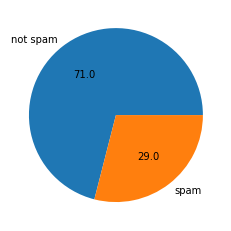

In [177]:
plt.pie(data['label'].value_counts(), labels=['not spam', 'spam'], autopct="%0.1f") #pie chart
plt.show() #show pie chart

In [178]:
X = data['text'] #set X
Y = data['label_num'] #set Y

In [179]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4) #split data into train and test

In [180]:
nb = MultinomialNB() #create naive bayes
feature_extractor= TfidfVectorizer(min_df=1,stop_words='english',lowercase='True') #create vectorizer
X_train=feature_extractor.fit_transform(X_train) #fit vectorizer
X_test=feature_extractor.transform(X_test) #transform
tfidf = TfidfVectorizer(max_features=5000) #create vectorizer

In [181]:
nb.fit(X_train,Y_train) #fit model
Y_pred = nb.predict(X_train) #predict
print(accuracy_score(Y_train, Y_pred)) #print accuracy
print(precision_score(Y_train, Y_pred)) #print precision

0.9662197008767406
0.9969818913480886


In [182]:
model = MultinomialNB() #create naive bayes
model.fit(X_train,Y_train) #fit model

MultinomialNB()

In [183]:
import pickle #pip install pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))     #save vectorizer
pickle.dump(nb, open('model.pkl', 'wb')) #save model

In [184]:
mail = ["Dear LOHITH, Thank you for joining IBM’s Talent Community! We are looking forward to staying in touch with you regarding upcoming events and career opportunities that match your interests.  You can also connect with us on social to gain even more insight into life at IBM. Thank you again.  We will be in touch soon! Regards, IBM Talent Acquisition Team"]
final_data=feature_extractor.transform(mail) #transform data

predictions=model.predict(final_data) #predict 
if (predictions[0]==0): #if else statement to classify message
  print("The mail received is NOT spam")
else:
  print("The mail received is spam")

The mail received is NOT spam


In [189]:
mail = ["Hi Lohith, Your experience at SUNY could make you a good fit for my Software Developer Engineer opportunity. If you're interested, please submit a quick application."]
final_data=feature_extractor.transform(mail)

predictions=model.predict(final_data)
if (predictions[0]==0):
  print("The mail received is NOT spam")
else:
  print("The mail receieved is spam")



The mail received is NOT spam


In [190]:
mail = ["Subject: young sluts had sex for tewnty bucks buenos noches !ta llueu"]
final_data=feature_extractor.transform(mail)

predictions=model.predict(final_data)
if (predictions[0]==0):
  print("The mail received is NOT spam")
else:
  print("The mail receieved is spam")

The mail receieved is spam


In [193]:

mail = ["Hi Bollineni, Join us live on our online workshop- How to publish your book at ZERO cost and learn how you can publish a professional book for FREE"]
final_data=feature_extractor.transform(mail)

predictions=model.predict(final_data)
if (predictions[0]==0):
  print("The mail received is NOT spam")
else:
  print("The mail receieved is spam")

The mail receieved is spam
